In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import xgboost as xgb

In [ ]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")
df=df.set_index("DateTime")
df.index = pd.to_datetime(df.index)

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

df.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [ ]:
print(df.shape)

(46011, 9)


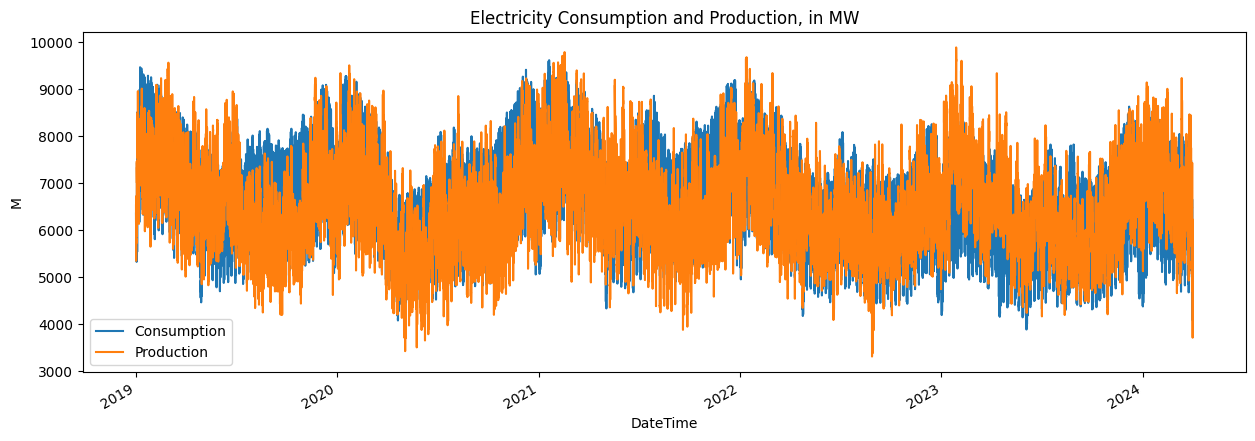

In [ ]:
df [["Consumption", "Production"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption and Production, in MW")
plt.ylabel('M')
plt.show()

In [ ]:
df.drop(["Production", "Nuclear", "Wind", "Hydroelectric", "Oil and Gas", "Coal", "Solar", "Biomass"], axis=1, inplace=True)

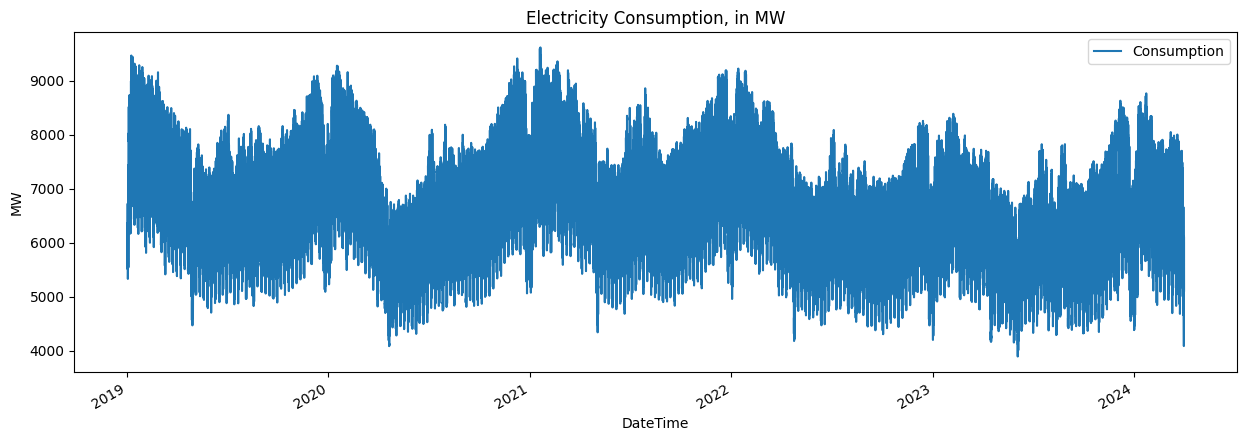

In [ ]:
df [["Consumption"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption, in MW")
plt.ylabel('MW')
plt.show()

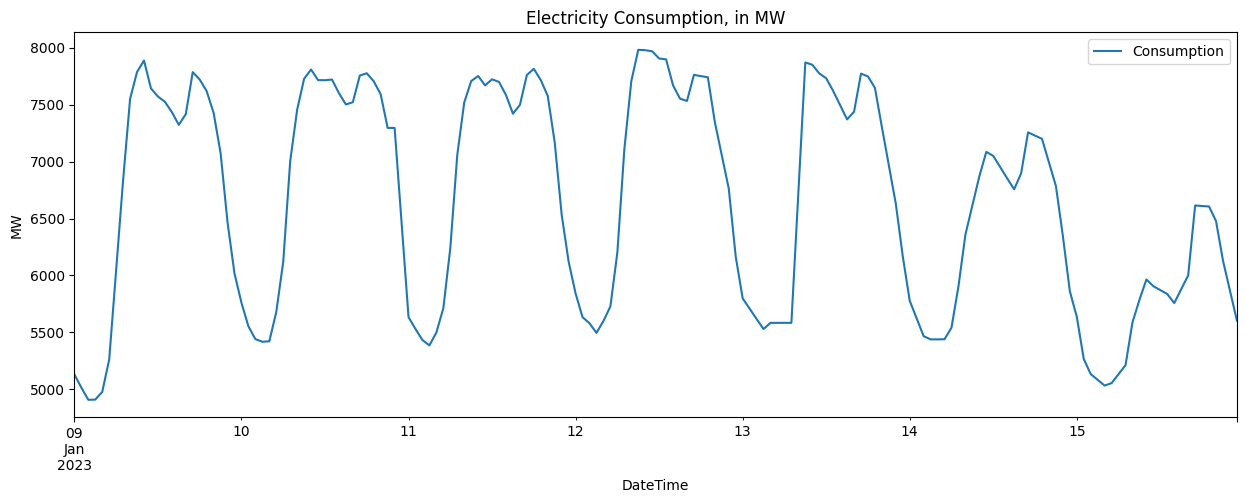

In [ ]:
df ["2023-01-09 00:00:00":"2023-01-15 23:59:59"] [["Consumption"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption, in MW")
plt.ylabel('MW')
plt.show()

In [ ]:
# method for adding time features by the time index def createTimeFeatures(df):
def createTimeFeatures(df):
  df["hour"] = df.index.hour
  df["day_of_week"]= df.index.day_of_week
  df["quarter"] = df.index.quarter
  df["month"] = df.index.month
  df["year"] = df.index.year
  df["day_of_year"] = df.index.dayofyear

# apply the method to the existing dataframe createTimeFeatures (df)
createTimeFeatures(df)
df.head()

,Consumption,hour,day_of_week,quarter,month,year,day_of_year
DateTime,,,,,,,
2019-01-01 00:00:00,6352,0,1,1,1,2019,1
2019-01-01 01:00:00,6116,1,1,1,1,2019,1
2019-01-01 02:00:00,5873,2,1,1,1,2019,1
2019-01-01 03:00:00,5682,3,1,1,1,2019,1
2019-01-01 04:00:00,5557,4,1,1,1,2019,1


cutoffDate {cutOffDate}
train size: 37252 and test 8759


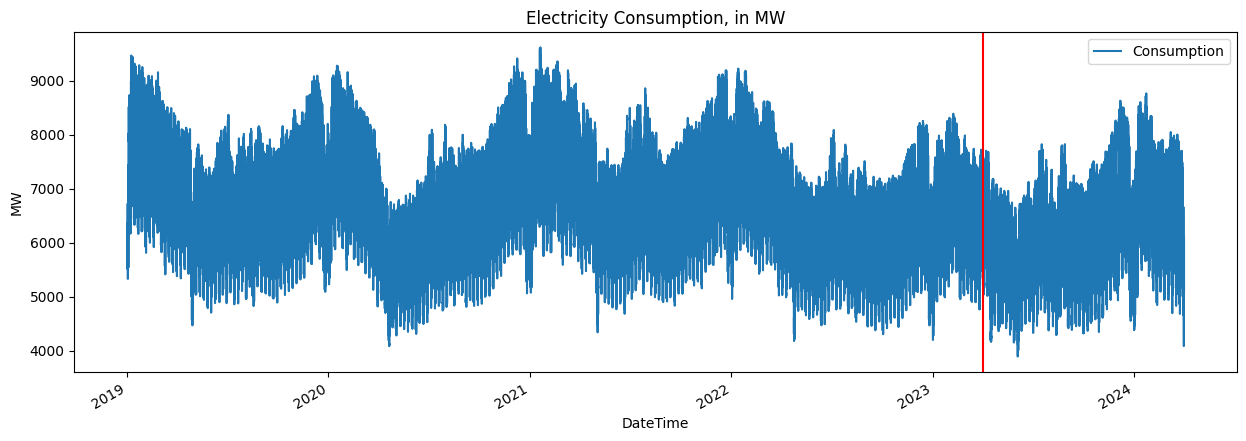

In [ ]:
cutoffDate = df.index [-365 * 24]
print("cutoffDate {cutOffDate}")

train = df.loc[df.index <= cutoffDate]
test = df.loc[df.index > cutoffDate]

print(f"train size: {len(train)} and test {len(test)}")

df [["Consumption"]].plot(style="-", figsize=(15, 5), title="Electricity Consumption, in MW")
plt.ylabel('MW')
plt.axvline(x=cutoffDate, color='r')
plt.show()

In [ ]:
def meanAbsolutErrorAaPercentage (real, predicted):
  real = np.array(real)
  predicted = np.array(predicted)
  return np.mean(np.abs((real - predicted) / real)) * 100

In [ ]:
# define our features and our target as separate arrays
FEATURES = ["hour", "day_of_week", "quarter", "month", "year", "day_of_year"]
TARGET = "Consumption"
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]
# define and XGB regressor, fit it on our train data and use it to predict our test data
regressor = xgb.XGBRegressor(n_estimators=5000, early_stoppin_rounds=50, learning_rate=0.01)

regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=108)
regressorOutput = regressor.predict(X_test)

prediction = pd.DataFrame(data=regressorOutput, index=X_test.index, columns=["prediction"])

df = df.merge(prediction, how="left", left_index=True, right_index=True)
# our predictions are at the end of the dataframe, so we should print that
df.tail()

[0]	validation_0-rmse:1025.28864	validation_1-rmse:1109.94953


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:24:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "early_stoppin_rounds" } are not used.

  warnings.warn(smsg, UserWarning)


[108]	validation_0-rmse:535.17330	validation_1-rmse:674.19497
[216]	validation_0-rmse:385.33078	validation_1-rmse:550.15138
[324]	validation_0-rmse:316.37272	validation_1-rmse:496.46166
[432]	validation_0-rmse:272.13132	validation_1-rmse:468.14602
[540]	validation_0-rmse:248.79640	validation_1-rmse:456.05655
[648]	validation_0-rmse:233.25934	validation_1-rmse:451.60517
[756]	validation_0-rmse:221.38027	validation_1-rmse:450.04797
[864]	validation_0-rmse:213.56210	validation_1-rmse:448.99506
[972]	validation_0-rmse:205.92061	validation_1-rmse:448.11187
[1080]	validation_0-rmse:198.96229	validation_1-rmse:447.00661
[1188]	validation_0-rmse:193.63617	validation_1-rmse:447.47763
[1296]	validation_0-rmse:188.52536	validation_1-rmse:447.09666
[1404]	validation_0-rmse:182.70158	validation_1-rmse:449.25890
[1512]	validation_0-rmse:177.92119	validation_1-rmse:450.86838
[1620]	validation_0-rmse:172.77308	validation_1-rmse:452.37599
[1728]	validation_0-rmse:169.15944	validation_1-rmse:452.84845
[

,Consumption,hour,day_of_week,quarter,month,year,day_of_year,prediction
DateTime,,,,,,,,
2024-03-31 19:00:00,5618,19,6,1,3,2024,91,6083.424805
2024-03-31 20:00:00,6107,20,6,1,3,2024,91,6404.908691
2024-03-31 21:00:00,5991,21,6,1,3,2024,91,6357.732422
2024-03-31 22:00:00,5527,22,6,1,3,2024,91,5791.026855
2024-03-31 23:00:00,5111,23,6,1,3,2024,91,5468.546875


In [ ]:
# select the part of the data frame that is our test part
testDf= df.loc[df.index > cutoffDate]
yReal = testDf["Consumption"]
yPredicted = testDf["prediction"]
print(f"percentage error: {meanAbsolutErrorAaPercentage (yReal, yPredicted):.4f}")

percentage error: 6.1507


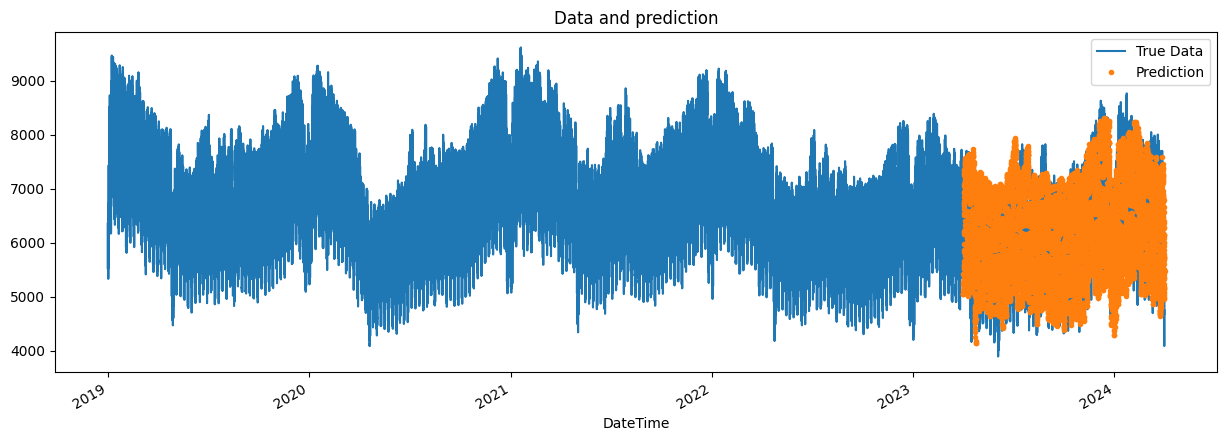

In [ ]:
ax = df [[TARGET]].plot(figsize=(15,5))
df["prediction"].plot(ax=ax, style=".")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and prediction")
plt.show()

In [ ]:
df['prediction'].plot(ax=ax, style='.')
prediction

,prediction
DateTime,
2023-04-02 01:00:00,5262.299805
2023-04-02 02:00:00,5116.643555
2023-04-02 03:00:00,5038.192383
2023-04-02 04:00:00,5038.801758
2023-04-02 05:00:00,5052.858398
...,...
2024-03-31 19:00:00,6083.424805
2024-03-31 20:00:00,6404.908691
2024-03-31 21:00:00,6357.732422


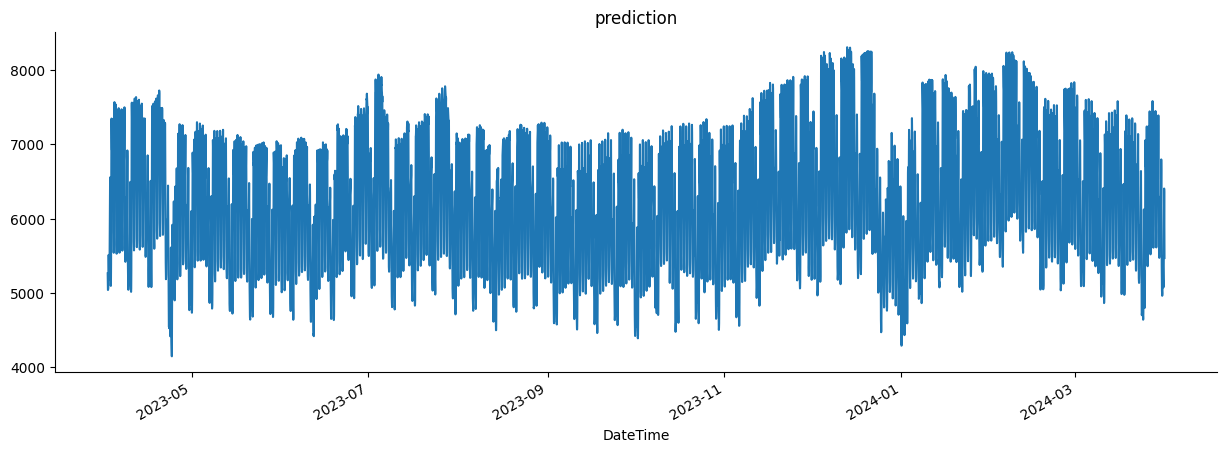

In [ ]:
#title prediction
prediction['prediction'].plot(kind='line', figsize=(15,5), title='prediction')
plt.gca().spines[['top', 'right']].set_visible(False)

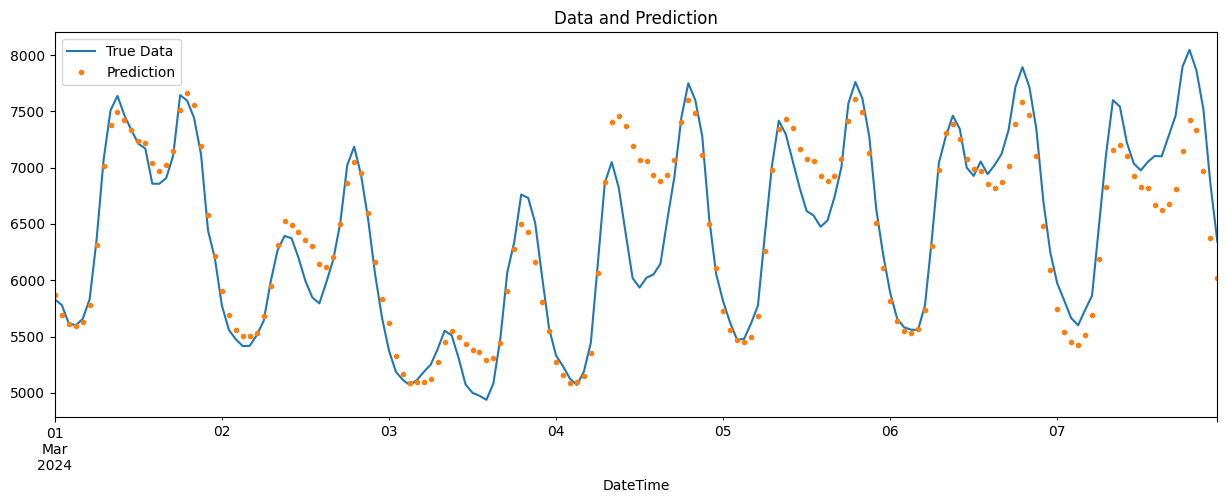

In [ ]:
ax = df['2024-03-01 00:00:00' : '2024-03-07 23:59:59'][[TARGET]].plot(figsize=(15,5))
df["2024-03-01 00:00:00" : "2024-03-7 23:59:59"]["prediction"].plot(ax=ax, style=".")
ax.legend(["True Data", "Prediction"])
ax.set_title("Data and Prediction")
plt.show()